In [1]:
import os
import shutil


def process_path(path):
    d = !pwd
    d = d[0]
    if path == '.':
        return d
    else:
        return os.path.join(d, path)

    
RAW_DATA_PATH = process_path('raw_data')
SCRIPTS_PATH = process_path('scripts')
RUNS_PATH = process_path('.')

In [2]:
RAW_DATA_PATH

'/Users/boyalex/Downloads/shad/nlp/project/search_based_nmt/he2en_problem/raw_data'

На всех данных

In [3]:
scores = []

In [4]:
cur_dir = os.path.join(RUNS_PATH, 'full_train')
data_dir = os.path.join(cur_dir, 'data')
model_dir = os.path.join(cur_dir, 'model')

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

                       
def copy_files(folder_from, folder_to, part='train'):
    shutil.copy(os.path.join(folder_from, 'he.{}.txt'.format(part)), 
                os.path.join(folder_to, 'he.train.txt'.format(part)))
    
    shutil.copy(os.path.join(folder_from, 'en.{}.txt'.format(part)), 
                os.path.join(folder_to, 'en.train.txt'.format(part)))
    
    shutil.copy(os.path.join(folder_from, 'he.dev.txt'), 
                os.path.join(folder_to, 'he.dev.txt'))
    
    shutil.copy(os.path.join(folder_from, 'en.dev.txt'), 
                os.path.join(folder_to, 'en.dev.txt'))
    
    shutil.copy(os.path.join(folder_from, 'he.test.txt'), 
                os.path.join(folder_to, 'he.test.txt'))
    
    shutil.copy(os.path.join(folder_from, 'en.test.txt'), 
                os.path.join(folder_to, 'en.test.txt'))
    
copy_files(RAW_DATA_PATH, data_dir, part='train')

In [5]:
!ls $data_dir

en.dev.txt   en.test.txt  en.train.txt he.dev.txt   he.test.txt  he.train.txt


In [6]:
!ls $SCRIPTS_PATH

README.md      reset_model.sh run_datagen.sh run_train.sh   tmp2.sh
args_parse.sh  run_all.sh     run_eval.sh    tmp.sh


In [7]:
problem_dir = process_path('t2t_problem')

In [8]:
full_run = !$SCRIPTS_PATH/run_all.sh --data_dir $data_dir --tmp_dir $cur_dir/tmp --train_dir $model_dir --t2t_usr_dir $problem_dir

In [9]:
full_run[-1]

'0.666206899383273'

Половина

In [10]:
cur_dir = os.path.join(RUNS_PATH, 'half_train')
data_dir = os.path.join(cur_dir, 'data')
model_dir = os.path.join(cur_dir, 'model')

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
copy_files(RAW_DATA_PATH, data_dir, part='train_2')

In [11]:
! ls $cur_dir/data

en.dev.txt   en.test.txt  en.train.txt he.dev.txt   he.test.txt  he.train.txt


In [12]:
half_run = !$SCRIPTS_PATH/run_all.sh --data_dir $data_dir --tmp_dir $cur_dir/tmp --train_dir $model_dir --t2t_usr_dir $problem_dir

In [13]:
half_run[-1]

'0.6557723614735206'

Четверть

In [14]:
cur_dir = os.path.join(RUNS_PATH, 'quarter_train')
data_dir = os.path.join(cur_dir, 'data')
model_dir = os.path.join(cur_dir, 'model')

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
copy_files(RAW_DATA_PATH, data_dir, part='train_4')

In [15]:
quarter_run = !$SCRIPTS_PATH/run_all.sh --data_dir $data_dir --tmp_dir $cur_dir/tmp --train_dir $model_dir --t2t_usr_dir $problem_dir


In [16]:
quarter_run[-1]

'0.6562037382083722'

1/8

In [17]:
cur_dir = os.path.join(RUNS_PATH, 'okta_train')
data_dir = os.path.join(cur_dir, 'data')
model_dir = os.path.join(cur_dir, 'model')

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
copy_files(RAW_DATA_PATH, data_dir, part='train_8')

In [18]:
okta_run = !$SCRIPTS_PATH/run_all.sh --data_dir $data_dir --tmp_dir $cur_dir/tmp --train_dir $model_dir --t2t_usr_dir $problem_dir


In [19]:
okta_run[-1]

'0.6637315729589169'

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
scores = list(map(float, [okta_run[-1], quarter_run[-1], half_run[-1], full_run[-1]]))

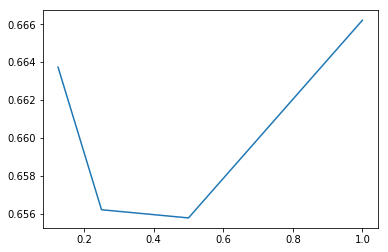

In [23]:
plt.plot([1./8, 1./4, 1./2, 1.], scores)